In [1]:
import os
import numpy
import patchify
import numpy as np
import geopandas as gpd
import xarray as xr
import rioxarray as rio
from matplotlib import pyplot as plt
import patchify

In [2]:
!pwd

/home/shaun/PHYS_391B


In [3]:
data_base = '/home/shaun/data/raw/new_data_tiff'
merged_base = r'/home/shaun/data/merged'
shape = os.path.join(merged_base, 'outlines/nz-building-outlines.shp')
shape

'/home/shaun/data/merged/outlines/nz-building-outlines.shp'

In [4]:
# now we can load the data into geopandas dataframes:
gdf_sh = gpd.read_file(shape)

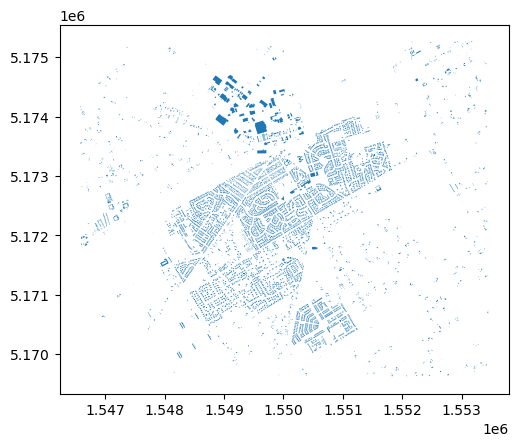

In [5]:
# quick look to see if it is there:
gdf_sh.plot()
plt.show()

In [6]:
# when using patchify, it uses patches = patchify(image, (x,y), step=z), where I want to use x=y=z=512.
# I also need to first make a merged mosaic tile of the tiff files, most easily done using gdal
import numpy as np
import matplotlib.pyplot as plt
import os, glob
from osgeo import gdal

In [7]:
files_to_mosaic = glob.glob(os.path.join(data_base, r'2015_2016') + '/*.tif')
files_to_mosaic

['/home/shaun/data/raw/new_data_tiff/2015_2016/RGB_BX23_5K_0504.tif',
 '/home/shaun/data/raw/new_data_tiff/2015_2016/RGB_BX23_5K_0605.tif',
 '/home/shaun/data/raw/new_data_tiff/2015_2016/RGB_BX23_5K_0606.tif',
 '/home/shaun/data/raw/new_data_tiff/2015_2016/RGB_BX23_5K_0603.tif',
 '/home/shaun/data/raw/new_data_tiff/2015_2016/RGB_BX23_5K_0503.tif',
 '/home/shaun/data/raw/new_data_tiff/2015_2016/RGB_BX23_5K_0506.tif',
 '/home/shaun/data/raw/new_data_tiff/2015_2016/RGB_BX23_5K_0505.tif',
 '/home/shaun/data/raw/new_data_tiff/2015_2016/RGB_BX23_5K_0604.tif']

In [8]:
files_string = " ".join(files_to_mosaic)
files_string

'/home/shaun/data/raw/new_data_tiff/2015_2016/RGB_BX23_5K_0504.tif /home/shaun/data/raw/new_data_tiff/2015_2016/RGB_BX23_5K_0605.tif /home/shaun/data/raw/new_data_tiff/2015_2016/RGB_BX23_5K_0606.tif /home/shaun/data/raw/new_data_tiff/2015_2016/RGB_BX23_5K_0603.tif /home/shaun/data/raw/new_data_tiff/2015_2016/RGB_BX23_5K_0503.tif /home/shaun/data/raw/new_data_tiff/2015_2016/RGB_BX23_5K_0506.tif /home/shaun/data/raw/new_data_tiff/2015_2016/RGB_BX23_5K_0505.tif /home/shaun/data/raw/new_data_tiff/2015_2016/RGB_BX23_5K_0604.tif'

In [10]:
# This may just be the ugliest function call I have seen in my life, but it works:
# https://gdal.org/programs/gdal_merge.html for docs.

# The below command worked like a charm, but is commented out so I don't accidentally run it again. It just takes forever.
# command = "gdal_merge.py -o /home/shaun/data/merged/2015_2016/2015_2016_mosaic.tif -of gtiff " + files_string
# print(os.popen(command).read())

In [ ]:
merged_file = r'/home/shaun/data/merged/2015_2016/2015_2016_mosaic.tif'
merged_im = rio.open_rasterio(merged_file, masked=True)
# I tried to plot the mosaic but this seems to have been a bad idea, since it just made my kernel crash.
# fig, ax = plt.subplots(figsize=(12,12))
# merged_im.astype("int").plot.imshow(rgb="band")
# plt.show()
# I am having a lot of issues with doing operations on this thing. I need to finish watching this video on how to get this thing
# split into patches: https://www.youtube.com/watch?v=7IL7LKSLb9I
# This next video could also be useful: https://www.youtube.com/watch?v=7IL7LKSLb9I
merged_im

In [12]:
merged_im.shape

(4, 18926, 22955)

In [ ]:
# I will attempt to try this next: https://gis.stackexchange.com/questions/354782/masking-netcdf-time-series-data-from-shapefile-using-python/354798#354798